In [3]:
library(tidyverse)
library(ggplot2)
library(gapminder)
library(socviz)
library(ggsci)
library("gridExtra")
library(stringr)
library(scales)
library("ggrepel")
library(cowplot)
library(gg.gap)
library(ggpol)
options(warn=-1)

## Figure 9B

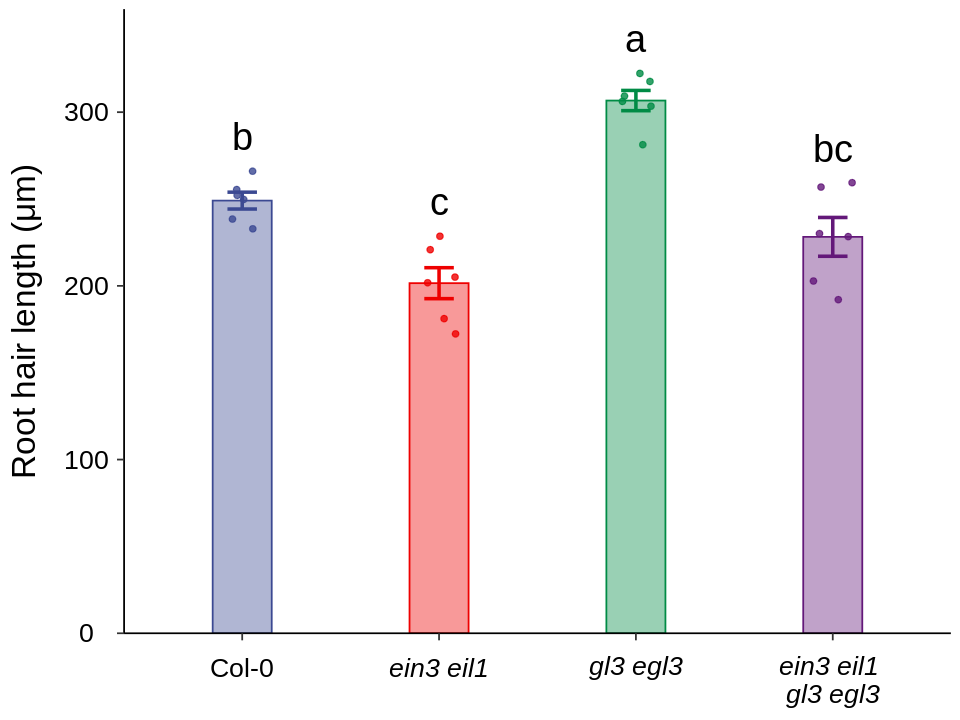

In [4]:
# data input and reshape
df <- read.csv("/Share2/home/qitiancong/00.project/04.Song_Lab/01.R_plots/01.data/9B.csv",
                header=TRUE,
                stringsAsFactors=TRUE)

# set df for sig note
df$max <- apply(df[,c(2:7)],1,max) + 20

# transformat df
df_long <- gather(df, replicate, value, R1:R6)

# set genotype order
df_long$genotype <- factor(df_long$genotype, levels=c("Col-0",
                                                      "ein3 eil1", 
                                                      "gl3 egl3",                                                                                                           
                                                      "ein3 eil1 gl3 egl3"))


# set theme function 
theme_custom <- function (base_size = 11, base_family = "", base_line_size = base_size/22, 
    base_rect_size = base_size/22) 
{
    theme_bw(base_size = base_size, base_family = base_family, 
        base_line_size = base_line_size, base_rect_size = base_rect_size) %+replace% 
        theme(panel.border = element_blank(), 
              panel.grid.major = element_blank(), 
              panel.grid.minor = element_blank(), 
              axis.line = element_line(colour = "black", size = rel(1)),
              axis.ticks.length=unit(.15, "cm"),
              legend.key = element_blank(), 
              strip.background = element_rect(fill = "white", colour = "black", size = rel(2)), 
              complete = TRUE,
#               axis.ticks.x = element_blank(),
              axis.text.x = element_text(size=16, angle=0, color="black",
#                                          hjust=1, vjust=1,
                                         margin = margin(t = 25, r = 0, b = 0, l = 0)),
              axis.text.y = element_text(size=16, color="black", margin = margin(t = 0, r = 5, b = 0, l = 0)),
              axis.title.x = element_blank(),
              axis.title.y = element_text(size=20, angle=90, margin = margin(t = 0, r = 15, b = 0, l = 0)),
              strip.text.x = element_blank(),
#               legend.title = element_blank(),
#               legend.position = c(0.82,0.7),
#               legend.position = "bottom",
#               legend.justification = "center",
#               legend.text = element_text(size = 18),
#               legend.text.align = 0
             )
}

# set figure size
options(repr.plot.width = 8, repr.plot.height = 6)

# generate x-tick label vector
xtick_labs <- c("Col-0\n",
               expression(italic("ein3 eil1\n")),
               expression(italic("gl3 egl3\n")),                              
               expression(italic("ein3 eil1 \n gl3 egl3"))
               )


p <- ggplot(df_long, aes(genotype, value, fill=genotype, color=genotype))
B9 <- p + stat_summary(fun="mean", 
                 geom="col", 
                 position = position_dodge(0.7),
                 width = 0.3,
                 alpha=0.4,
                 show.legend=FALSE) + 
    stat_summary(fun.data = mean_se, 
                 geom = "errorbar", 
                 position = position_dodge(width=0.7),
                 width = 0.15,
                 size=1,
                show.legend=FALSE) +
    geom_jitter(alpha=0.8, 
                width=0.1,
                show.legend=FALSE) +
    theme_custom() +
    scale_fill_aaas() +
    scale_color_aaas() +
    scale_x_discrete(labels=xtick_labs) +
    ylab(quote("Root hair length (μm)")) +
    geom_text(data=df,aes(x=genotype,y=max,label=sig),size=8,color="black",show.legend=FALSE) +
    scale_y_continuous(expand = expansion(mult = c(0, 0.05)))
#     annotate(geom="text", x=7, y=40,size=10,
#             label=expression(italic("S. exigua")))
B9


## Figure 9C

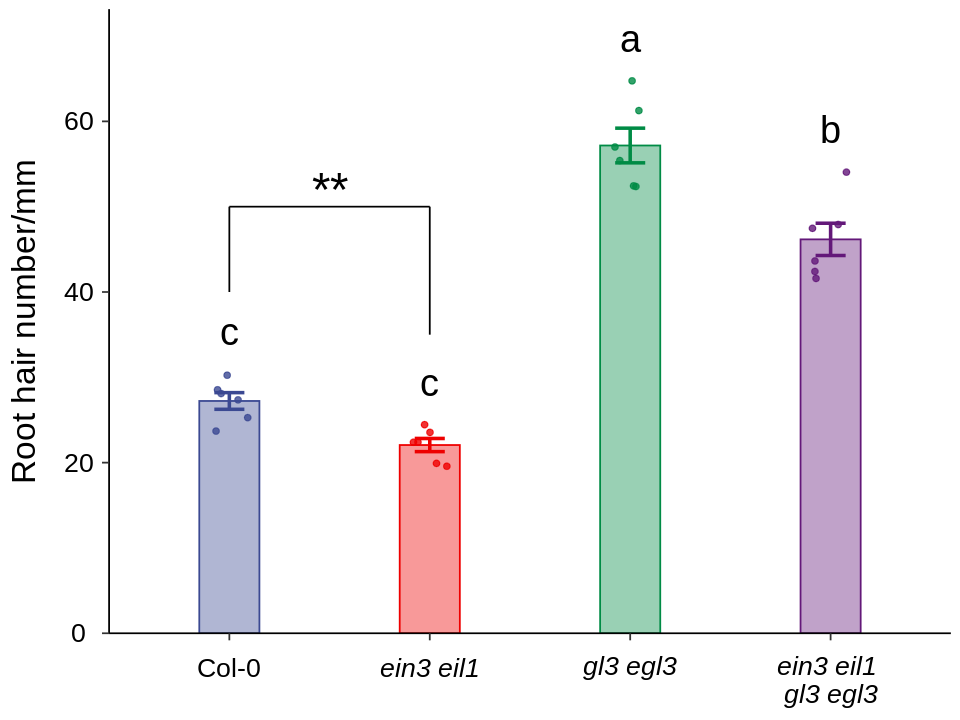

In [5]:
# data input and reshape
df <- read.csv("/Share2/home/qitiancong/00.project/04.Song_Lab/01.R_plots/01.data/9C.csv",
                header=TRUE,
                stringsAsFactors=TRUE)

# set df for sig note
df$max <- apply(df[,c(2:7)],1,max) + 5

# transformat df
df_long <- gather(df, replicate, value, R1:R6)

# set genotype order
df_long$genotype <- factor(df_long$genotype, levels=c("Col-0",
                                                      "ein3eil1", 
                                                      "g3eg3",                                                                                                           
                                                      "e3e1g3eg3"))


# set theme function 
theme_custom <- function (base_size = 11, base_family = "", base_line_size = base_size/22, 
    base_rect_size = base_size/22) 
{
    theme_bw(base_size = base_size, base_family = base_family, 
        base_line_size = base_line_size, base_rect_size = base_rect_size) %+replace% 
        theme(panel.border = element_blank(), 
              panel.grid.major = element_blank(), 
              panel.grid.minor = element_blank(), 
              axis.line = element_line(colour = "black", size = rel(1)),
              axis.ticks.length=unit(.15, "cm"),
              legend.key = element_blank(), 
              strip.background = element_rect(fill = "white", colour = "black", size = rel(2)), 
              complete = TRUE,
#               axis.ticks.x = element_blank(),
              axis.text.x = element_text(size=16, angle=0, color="black",
#                                          hjust=1, vjust=1,
                                         margin = margin(t = 25, r = 0, b = 0, l = 0)),
              axis.text.y = element_text(size=16, color="black", margin = margin(t = 0, r = 5, b = 0, l = 0)),
              axis.title.x = element_blank(),
              axis.title.y = element_text(size=20, angle=90, margin = margin(t = 0, r = 15, b = 0, l = 0)),
              strip.text.x = element_blank(),
#               legend.title = element_blank(),
#               legend.position = c(0.82,0.7),
#               legend.position = "bottom",
#               legend.justification = "center",
#               legend.text = element_text(size = 18),
#               legend.text.align = 0
             )
}

# set figure size
options(repr.plot.width = 8, repr.plot.height = 6)

# generate x-tick label vector
xtick_labs <- c("Col-0\n",
               expression(italic("ein3 eil1\n")),
               expression(italic("gl3 egl3\n")),                              
               expression(italic("ein3 eil1 \n gl3 egl3"))
               )


p <- ggplot(df_long, aes(genotype, value, fill=genotype, color=genotype))
C9 <- p + stat_summary(fun="mean", 
                 geom="col", 
                 position = position_dodge(0.7),
                 width = 0.3,
                 alpha=0.4,
                 show.legend=FALSE) + 
    stat_summary(fun.data = mean_se, 
                 geom = "errorbar", 
                 position = position_dodge(width=0.7),
                 width = 0.15,
                 size=1,
                show.legend=FALSE) +
    geom_jitter(alpha=0.8, 
                width=0.1,
                show.legend=FALSE) +
    theme_custom() +
    scale_fill_aaas() +
    scale_color_aaas() +
    scale_x_discrete(labels=xtick_labs) +
    ylab(quote("Root hair number/mm")) +
    geom_text(data=df,aes(x=genotype,y=max,label=sig),size=8,color="black",show.legend=FALSE) +
    scale_y_continuous(expand = expansion(mult = c(0, 0.05))) +
    annotate(geom = "line",
           x = c(1, 1),
           y = c(40, 50)) +
    annotate(geom = "line",
           x = c(2, 2),
           y = c(35, 50)) +
    annotate(geom = "line",
           x = c(1, 2),
           y = c(50, 50)) +
    annotate(geom="text", x=1.5, y=52,size=10,
            label=expression("**"))
C9


## Figure 9D

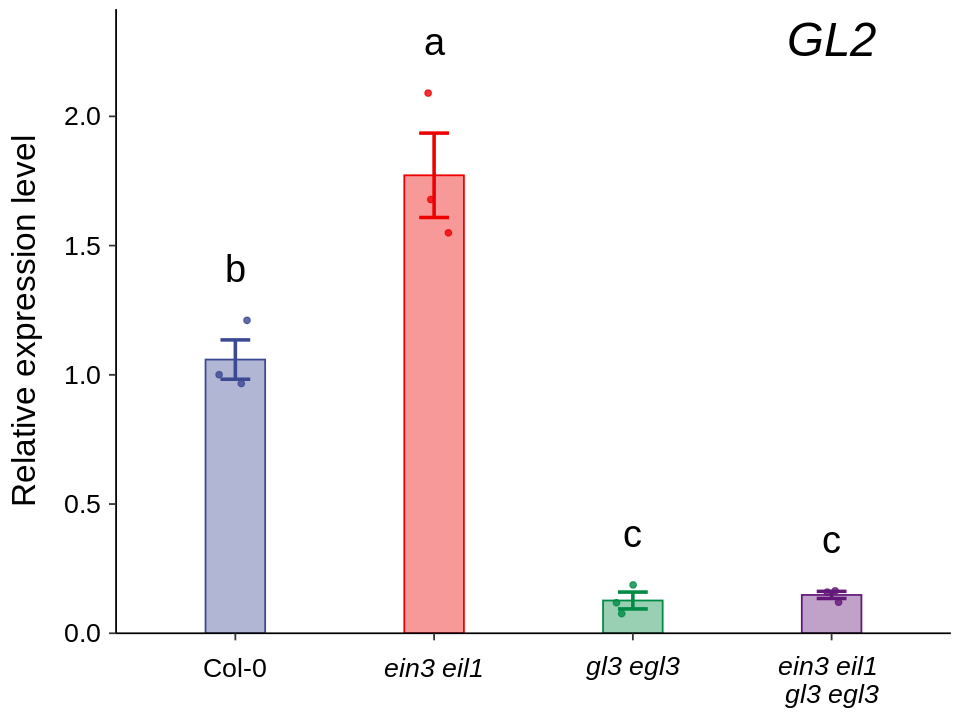

In [6]:
# data input and reshape
df <- read.csv("/Share2/home/qitiancong/00.project/04.Song_Lab/01.R_plots/01.data/9D.csv",
                header=TRUE,
                stringsAsFactors=TRUE)

# set df for sig note
df$max <- apply(df[,c(2:4)],1,max) + 0.2

# transformat df
df_long <- gather(df, replicate, value, R1:R3)

# set genotype order
df_long$genotype <- factor(df_long$genotype, levels=c("Col-0",
                                                      "ein3eil1", 
                                                      "gl3egl3",                                                                                                           
                                                      "gl3egl3ein3eil1"))


# set theme function 
theme_custom <- function (base_size = 11, base_family = "", base_line_size = base_size/22, 
    base_rect_size = base_size/22) 
{
    theme_bw(base_size = base_size, base_family = base_family, 
        base_line_size = base_line_size, base_rect_size = base_rect_size) %+replace% 
        theme(panel.border = element_blank(), 
              panel.grid.major = element_blank(), 
              panel.grid.minor = element_blank(), 
              axis.line = element_line(colour = "black", size = rel(1)),
              axis.ticks.length=unit(.15, "cm"),
              legend.key = element_blank(), 
              strip.background = element_rect(fill = "white", colour = "black", size = rel(2)), 
              complete = TRUE,
#               axis.ticks.x = element_blank(),
              axis.text.x = element_text(size=16, angle=0, color="black",
#                                          hjust=1, vjust=1,
                                         margin = margin(t = 25, r = 0, b = 0, l = 0)),
              axis.text.y = element_text(size=16, color="black", margin = margin(t = 0, r = 5, b = 0, l = 0)),
              axis.title.x = element_blank(),
              axis.title.y = element_text(size=20, angle=90, margin = margin(t = 0, r = 15, b = 0, l = 0)),
              strip.text.x = element_blank(),
#               legend.title = element_blank(),
#               legend.position = c(0.82,0.7),
#               legend.position = "bottom",
#               legend.justification = "center",
#               legend.text = element_text(size = 18),
#               legend.text.align = 0
             )
}

# set figure size
options(repr.plot.width = 8, repr.plot.height = 6)

# generate x-tick label vector
xtick_labs <- c("Col-0\n",
               expression(italic("ein3 eil1\n")),
               expression(italic("gl3 egl3\n")),                              
               expression(italic("ein3 eil1 \n gl3 egl3"))
               )


p <- ggplot(df_long, aes(genotype, value, fill=genotype, color=genotype))
D9 <- p + stat_summary(fun="mean", 
                 geom="col", 
                 position = position_dodge(0.7),
                 width = 0.3,
                 alpha=0.4,
                 show.legend=FALSE) + 
    stat_summary(fun.data = mean_se, 
                 geom = "errorbar", 
                 position = position_dodge(width=0.7),
                 width = 0.15,
                 size=1,
                show.legend=FALSE) +
    geom_jitter(alpha=0.8, 
                width=0.1,
                show.legend=FALSE) +
    theme_custom() +
    scale_fill_aaas() +
    scale_color_aaas() +
    scale_x_discrete(labels=xtick_labs) +
    ylab(quote("Relative expression level")) +
    geom_text(data=df,aes(x=genotype,y=max,label=sig),size=8,color="black",show.legend=FALSE) +
    scale_y_continuous(expand = expansion(mult = c(0, 0.05))) +
#     annotate(geom = "line",
#            x = c(1, 1),
#            y = c(40, 50)) +
#     annotate(geom = "line",
#            x = c(2, 2),
#            y = c(35, 50)) +
#     annotate(geom = "line",
#            x = c(1, 2),
#            y = c(50, 50)) +
    annotate(geom="text", x=4, y=2.3,size=10,
            label=expression(italic("GL2")))
D9


## Combination

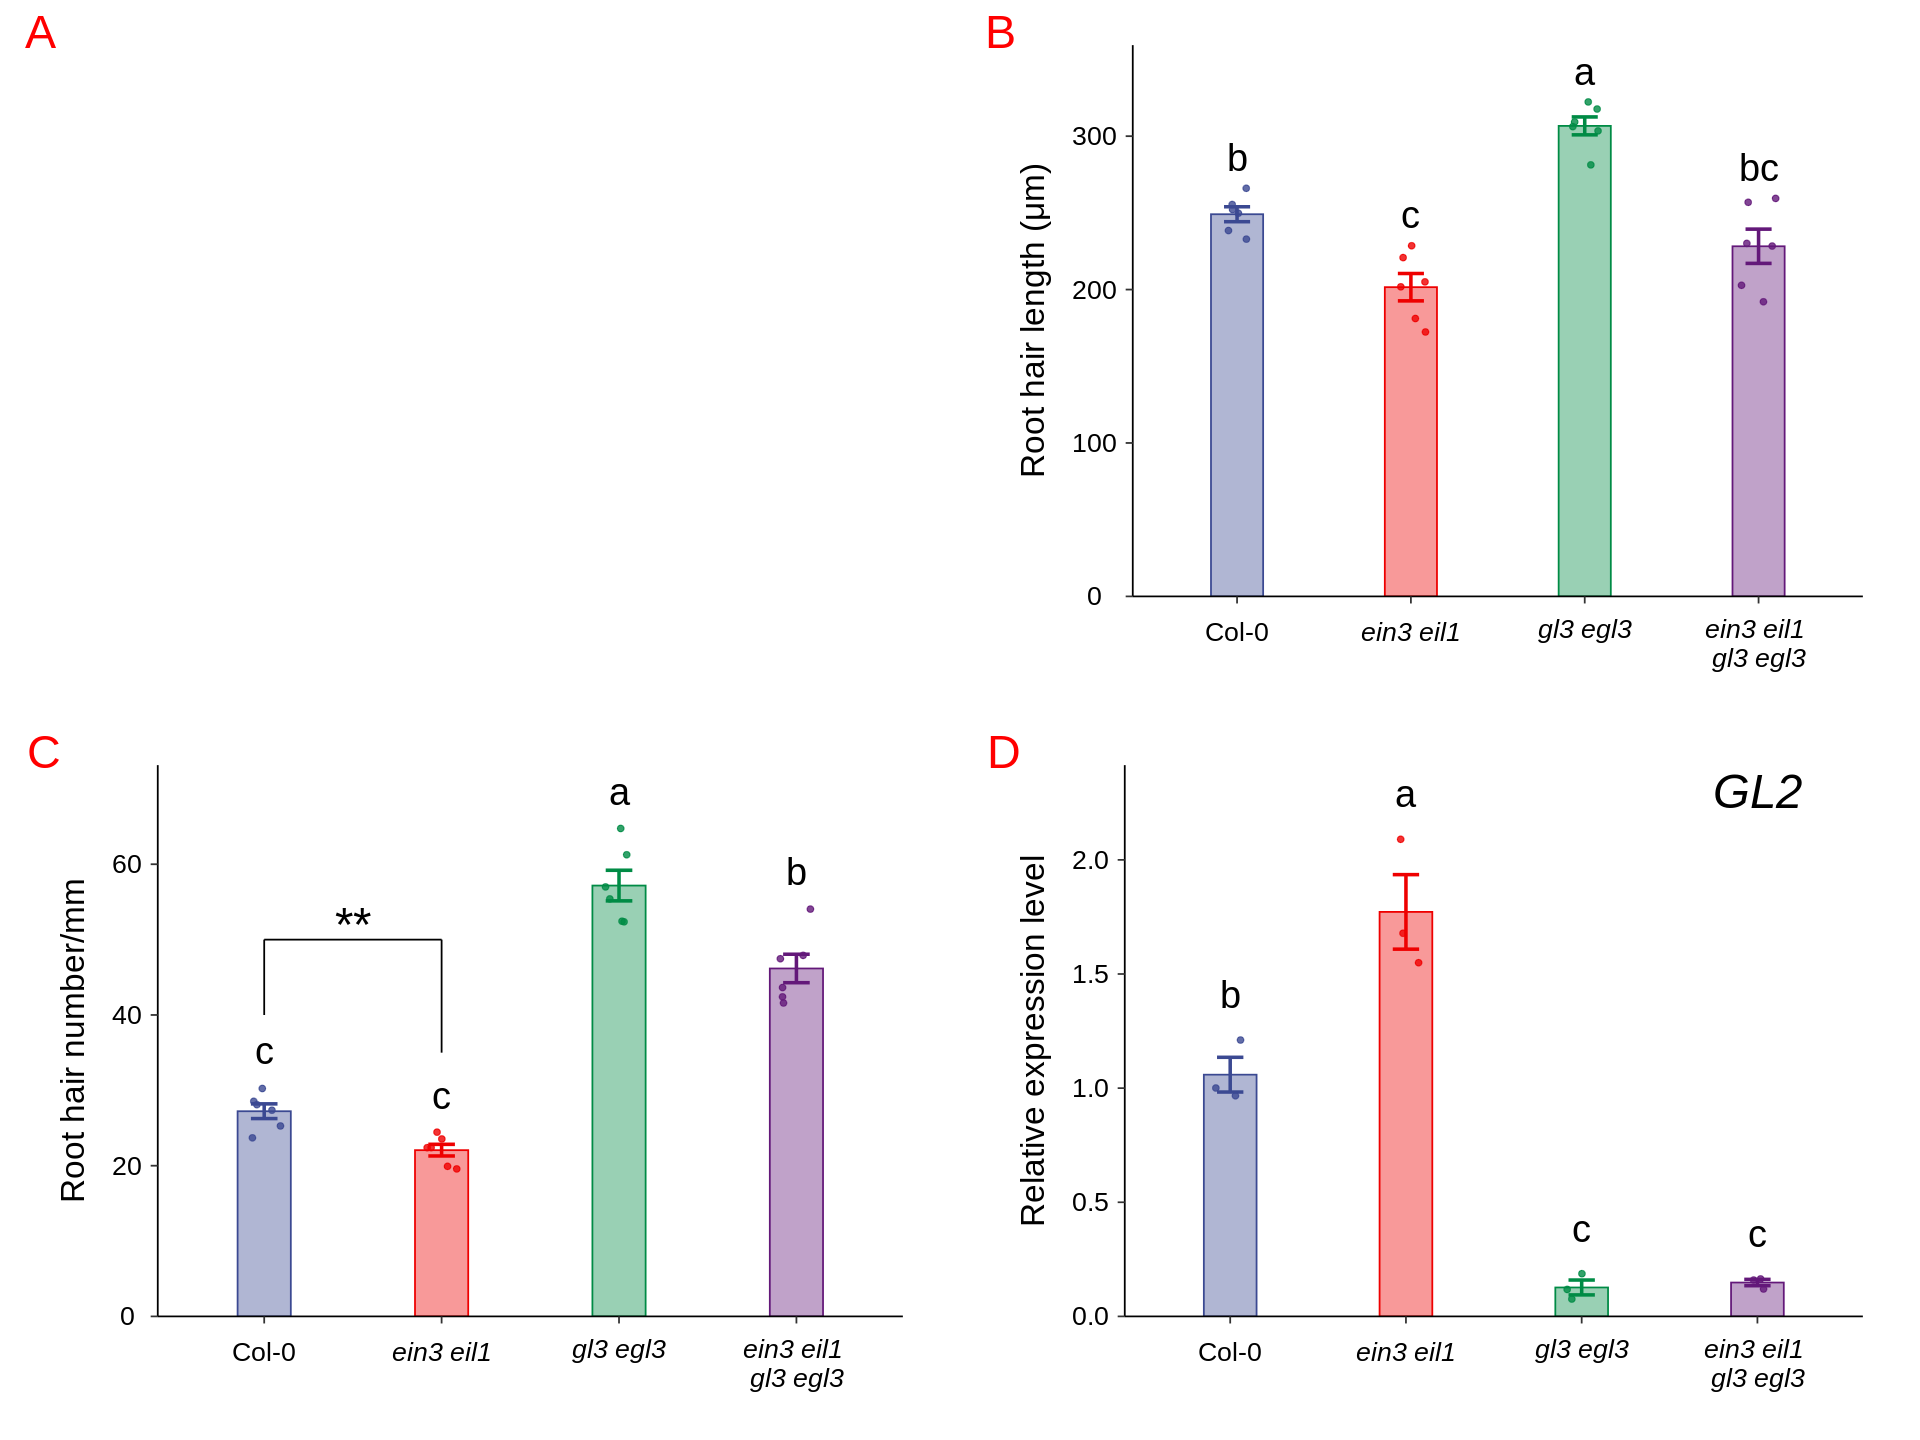

In [7]:
options(repr.plot.width = 16, repr.plot.height = 12)
fig9 <- plot_grid(NULL,B9,C9,D9,
          ncol=2,
#           rel_heights=c(4,6,10),
          labels = c('A','B','C','D'),
          label_colour = 'red',
          label_x = 0.01,
          label_y = 1,
          label_fontface = 1,
          label_size = 28,
                 scale=0.9)
fig9
ggsave2("/Share2/home/qitiancong/00.project/04.Song_Lab/01.R_plots/01.data/9_fig_done/Figure9.png",
      fig9, height=12, width=16, dpi=300)